## CNN - Example 06

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

### Load Dataset

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#### Normalize

In [4]:
X_train = X_train / 255.0
X_test  = X_test / 255.0

In [6]:
print("x_train.shape:", X_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000, 1)


In [7]:
print("y_train.shape", y_train.shape)
print("y_train before flatten() :", y_train)

y_train.shape (50000, 1)
y_train before flatten() : [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


#### Flatten the label vector

In [8]:
# Flatten the label vector
y_train = y_train.flatten()
y_test  = y_test.flatten()

In [9]:
print("y_train.shape", y_train.shape)
print("y_train after flatten() :", y_train)
print("y_train[0] after flatten() :", y_train[0])

y_train.shape (50000,)
y_train after flatten() : [6 9 9 ... 9 1 1]
y_train[0] after flatten() : 6


#### Find number of classes

In [10]:
# number of classes
K = len(set(y_train))
print("Number of label classes:", K)

Number of label classes: 10


#### One hot encoding

In [11]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, K)
y_cat_test = to_categorical(y_test, K)

print("y_train.shape", y_train.shape)
print("y_cat_train.shape", y_cat_train.shape)
print("y_train[0] after flatten() :", y_train[0])
print("y_cat_train after one hot encoding :", y_cat_train[0])

y_train.shape (50000,)
y_cat_train.shape (50000, 10)
y_train[0] after flatten() : 6
y_cat_train after one hot encoding : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Model # 1

In [13]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [14]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)             

In [44]:
# Model using flatten y_test
model_history = model.fit(X_train, y_train, 
                          validation_data=(X_test, y_test), 
                          epochs=15)

Epoch 1/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6358 - accuracy: 0.7716 - val_loss: 0.8419 - val_accuracy: 0.7063
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6161 - accuracy: 0.7803 - val_loss: 0.8132 - val_accuracy: 0.7228
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6002 - accuracy: 0.7887 - val_loss: 0.8312 - val_accuracy: 0.7156
Epoch 4/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5925 - accuracy: 0.7892 - val_loss: 0.8274 - val_accuracy: 0.7170
Epoch 5/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5760 - accuracy: 0.7956 - val_loss: 0.8126 - val_accuracy: 0.7213
Epoch 6/15
1563/1563 [==============================] - 35s 23ms/step - loss: 0.5685 - accuracy: 0.7994 - val_loss: 0.8191 - val_accuracy: 0.7207
Epoch 7/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.5463 - accuracy: 0.8061 - val_loss: 0.8294 -

#### Model Evaluation

In [45]:
print(model.metrics_names)

['loss', 'accuracy']


##### Eval - Train

In [46]:
pd.DataFrame(model_history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.635757,0.77162,0.841877,0.7063
1,0.616085,0.78026,0.813213,0.7228
2,0.600223,0.78874,0.831176,0.7156
3,0.592502,0.78922,0.827396,0.7170
4,0.576025,0.79560,0.812550,0.7213


In [47]:
pd.DataFrame(model_history.history).tail(1)

,loss,accuracy,val_loss,val_accuracy
14,0.482284,0.8301,0.843937,0.7206


In [48]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

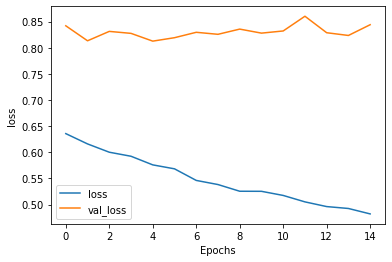

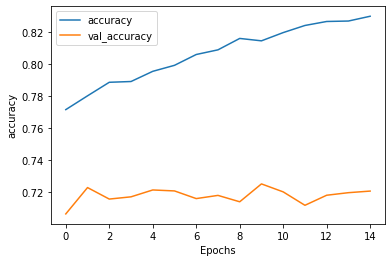

In [49]:
plot_graphs(model_history, "loss")    
plot_graphs(model_history, "accuracy")

##### Eval - Test

In [50]:
test_metrics = model.evaluate(X_test,y_test,verbose=0)

In [51]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 0.8439367413520813
Accuracy on test dataset: 0.7206000089645386


In [52]:
print("Loss and Accuracy on Train dataset:")

Loss and Accuracy on Train dataset:


In [53]:
pd.DataFrame(model_history.history).tail(1)

,loss,accuracy,val_loss,val_accuracy
14,0.482284,0.8301,0.843937,0.7206


#### Predictions

In [54]:
y_prediction = np.argmax(model.predict(X_test), axis=-1)

#### Reports

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.82      0.85      0.83      1000
           2       0.72      0.55      0.62      1000
           3       0.52      0.50      0.51      1000
           4       0.68      0.69      0.68      1000
           5       0.56      0.64      0.60      1000
           6       0.74      0.82      0.78      1000
           7       0.79      0.76      0.78      1000
           8       0.80      0.86      0.83      1000
           9       0.82      0.79      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

[[755  26  23  17  23  16   7   7  93  33]
 [ 14 848   6   9   2   7   9   5  32  68]
 [ 82   7 549  75  78  87  73  21  19   9]
 [ 27  11  43 498  69 206  78  40  12  16]
 [ 25   5  54  70 686  47  56  45   9   3]
 [ 13   3  31 175  40 640 

<AxesSubplot:>

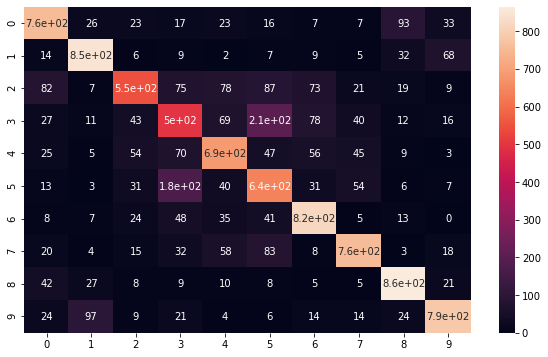

In [55]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Get the Y labels as text

In [56]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

#### Predictions go wrong!

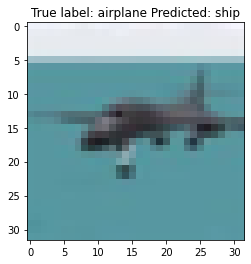

In [57]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]

i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_prediction[i]]));

#### Conclusion : Final thoughts

In [58]:
# Rule of thumb
# 1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
# 2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
# 3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
# 4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [59]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")

Percentage of wrong predcitions : 27.939999999999998 %


In [60]:
print("Model's maximum accuracy            : " + str(np.max(model_history.history['accuracy'])*100) + " %")
print("Model's maximum validation accuracy : " + str(np.max(model_history.history['val_accuracy'])*100) + " %")

Model's maximum accuracy            : 83.00999999046326 %
Model's maximum validation accuracy : 72.50999808311462 %


In [61]:
# Model has High Bias and High Variance with 5% gap. It should be improved further to 99%

### Model # 2

Train model using one hot encoding ys

In [66]:
# Compile and fit
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              #tf.losses.sparse_softmax_cross_entropy(labels, logits),
              metrics=['accuracy'])

In [67]:
# Model using one hot encoding for y_train
model2_history = model.fit(X_train, 
                           y_cat_train, 
                           #validation_data=(X_test, y_cat_test), 
                           epochs=15)

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4914 - accuracy: 0.82730s
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.4746 - accuracy: 0.8346
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 0.4656 - accuracy: 0.8385
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4620 - accuracy: 0.8395
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4575 - accuracy: 0.8416
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4560 - accuracy: 0.84173s - loss: 0.4 - E
Epoch 7/15
1563/1563 [==============================] - 38s 25ms/step - loss: 0.4490 - accuracy: 0.8447
Epoch 8/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4483 - accuracy: 0.84560s - loss: 0.4485 - accu
Epoch 9/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4390 - accuracy: 0.8463
Epoch 10/15
1563/156

##### Eval - Test

In [69]:
test_metrics = model.evaluate(X_test,y_cat_test,verbose=0)

In [70]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 0.8578584790229797
Accuracy on test dataset: 0.7200000286102295


In [71]:
print("Loss and Accuracy on Train dataset:")

Loss and Accuracy on Train dataset:


In [72]:
pd.DataFrame(model2_history.history).tail(1)

,loss,accuracy
14,0.415347,0.85662


#### Predictions

In [73]:
y_prediction = np.argmax(model.predict(X_test), axis=-1)

#### Reports

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.86      0.81      0.83      1000
           2       0.69      0.56      0.62      1000
           3       0.53      0.53      0.53      1000
           4       0.67      0.68      0.68      1000
           5       0.59      0.61      0.60      1000
           6       0.70      0.85      0.77      1000
           7       0.77      0.78      0.77      1000
           8       0.85      0.79      0.82      1000
           9       0.78      0.81      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

[[774  15  35  18  19  10  10  17  55  47]
 [ 17 808   5  12   5  12  10   6  25 100]
 [ 60   3 557  75  93  73  94  28  10   7]
 [ 14   6  53 530  63 178 104  30  10  12]
 [ 17   2  42  64 684  36  78  68   7   2]
 [  8   2  32 193  45 613 

<AxesSubplot:>

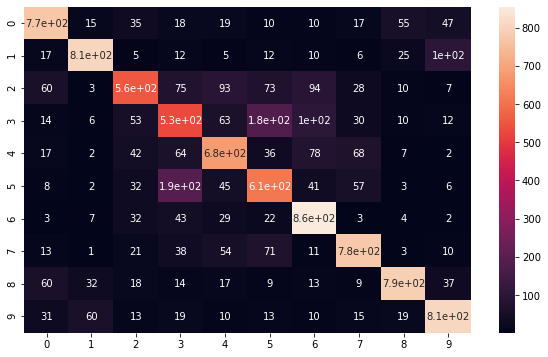

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Get the Y labels as text

In [56]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

#### Predictions go wrong!

<ipython-input-78-546b967b64fa>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_idx = np.where(y_prediction != y_cat_test)[0]


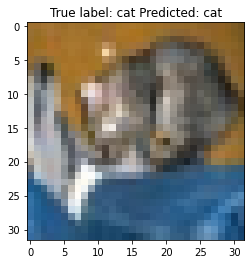

In [78]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_cat_test)[0]

i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_prediction[i]]));

#### Conclusion : Final thoughts

In [58]:
# Rule of thumb
# 1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
# 2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
# 3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
# 4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [59]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")

Percentage of wrong predcitions : 27.939999999999998 %


In [60]:
print("Model's maximum accuracy            : " + str(np.max(model_history.history['accuracy'])*100) + " %")
print("Model's maximum validation accuracy : " + str(np.max(model_history.history['val_accuracy'])*100) + " %")

Model's maximum accuracy            : 83.00999999046326 %
Model's maximum validation accuracy : 72.50999808311462 %


In [61]:
# Model has High Bias and High Variance with 5% gap. It should be improved further to 99%

In [ ]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

  return model
